### Chapter 8. Reinforcement learning

In [13]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
            
from matplotlib import pyplot as plt         
import numpy as np                           
import tensorflow as tf                      
import random

In [165]:
def plot_prices(prices):
    
    fix, ax = plt.subplots(figsize=(10,10))
    
    plt.title('Opening stock prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    ax.plot(prices)
    
    plt.tight_layout()
    plt.savefig('prices.png')

In [149]:
def get_prices(param, cache_filename='stock_pricesa.npy'):
    try:                                                                   
        stock_prices = np.load(cache_filename)
    except IOError:
        stock_hist = get_price_data(param)
        stock_prices = stock_hist.Open 
        np.save(cache_filename, stock_prices.values)                              

    return stock_prices

In [166]:
param = {
	'q': ".DJI", # Stock symbol (ex: "AAPL")
	'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
	'x': "INDEXDJX", # Stock exchange symbol on which stock is traded (ex: "NASD")
	'p': "15Y" # Period (Ex: "1Y" = 1 year)
}

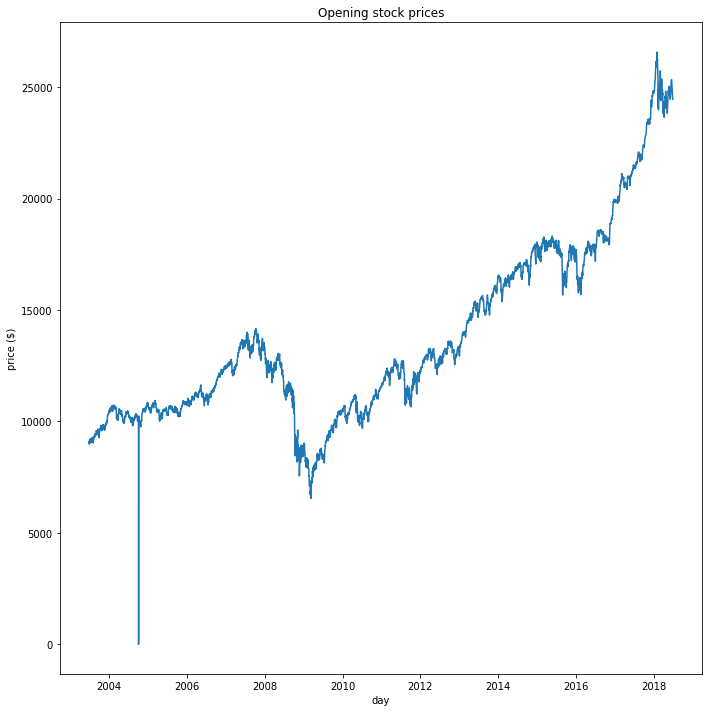

In [167]:
prices = get_prices(param)
plot_prices(prices)

In [168]:
class DecisionPolicy:
    def select_action(self, current_state):                 
        pass

    def update_q(self, state, action, reward, next_state):  
        pass

In [169]:
class RandomDecisionPolicy(DecisionPolicy):           
    def __init__(self, actions):
        self.actions = actions

    def select_action(self, current_state):          
        action = random.choice(self.actions)
        return action

In [173]:
def run_simulation(policy, initial_budget, initial_num_stocks, prices, hist):
    budget = initial_budget                                                
    num_stocks = initial_num_stocks                                        
    share_value = 0                                                        
    transitions = list()
    
    for i in range(len(prices) - hist - 1):
        if i % 1000 == 0:
            print('progress {:.2f}%'.format(float(100*i) / (len(prices) - hist - 1)))
        current_state = np.asmatrix(np.hstack((prices[i:i+hist], budget, num_stocks)))                                                         
        current_portfolio = budget + num_stocks * share_value              
        action = policy.select_action(current_state)                    
        share_value = float(prices[i + hist])
        
        if action == 'Buy' and budget >= share_value:                      
            budget -= share_value
            num_stocks += 1
        elif action == 'Sell' and num_stocks > 0:                          
            budget += share_value
            num_stocks -= 1
        else:                                                              
            action = 'Hold'
        new_portfolio = budget + num_stocks * share_value                  
        reward = new_portfolio - current_portfolio                         
        next_state = np.asmatrix(np.hstack((prices[i+1:i+hist+1], budget, num_stocks)))
        transitions.append((current_state, action, reward, next_state))
        policy.update_q(current_state, action, reward, next_state)         

    portfolio = budget + num_stocks * share_value                          
    return portfolio

In [179]:
def run_simulations(policy, budget, num_stocks, prices, hist):
    num_tries = 10                                                         
    final_portfolios = list()                                              
    for i in range(num_tries):
        final_portfolio = run_simulation(policy, budget, num_stocks, prices, hist)                                                                 
        final_portfolios.append(final_portfolio)
        print('Final portfolio: ${}'.format(final_portfolio))
        

In [180]:
prices = get_prices(param)
# plot_prices(prices)

actions = ['Buy', 'Sell', 'Hold']                               
hist = 3

policy = RandomDecisionPolicy(actions)                          
budget = 100000.0                                               
num_stocks = 0                                                  
run_simulations(policy, budget, num_stocks, prices, hist)

progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $144636.77999999962
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $153730.45
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $199721.61999999988
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $133901.62999999983
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $151355.69999999995
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $155358.45999999996
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $163360.39999999976
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $147395.77000000005
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $186565.74000000025
progress 0.00%
progress 26.51%
progress 53.02%
progress 79.53%
Final portfolio: $187326.54000000004
